In [1]:
import nfl_data_py as nfl
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import urllib.request
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from adjustText import adjust_text

In [2]:
import_data = nfl.import_seasonal_data([2022])   
import_data.columns

Index(['player_id', 'season', 'season_type', 'completions', 'attempts',
       'passing_yards', 'passing_tds', 'interceptions', 'sacks', 'sack_yards',
       'sack_fumbles', 'sack_fumbles_lost', 'passing_air_yards',
       'passing_yards_after_catch', 'passing_first_downs', 'passing_epa',
       'passing_2pt_conversions', 'pacr', 'dakota', 'carries', 'rushing_yards',
       'rushing_tds', 'rushing_fumbles', 'rushing_fumbles_lost',
       'rushing_first_downs', 'rushing_epa', 'rushing_2pt_conversions',
       'receptions', 'targets', 'receiving_yards', 'receiving_tds',
       'receiving_fumbles', 'receiving_fumbles_lost', 'receiving_air_yards',
       'receiving_yards_after_catch', 'receiving_first_downs', 'receiving_epa',
       'receiving_2pt_conversions', 'racr', 'target_share', 'air_yards_share',
       'wopr_x', 'special_teams_tds', 'fantasy_points', 'fantasy_points_ppr',
       'games', 'tgt_sh', 'ay_sh', 'yac_sh', 'wopr_y', 'ry_sh', 'rtd_sh',
       'rfd_sh', 'rtdfd_sh', 'dom', '

In [3]:
qb_season_data = pd.DataFrame(index = import_data.index)
qb_season_data["Player ID"] = import_data["player_id"]
qb_season_data["Completions"] = import_data["completions"]
qb_season_data["Attempts"] = import_data["attempts"]
qb_season_data["Passing Yards"] = import_data["passing_yards"]
qb_season_data["Passing TDs"] = import_data["passing_tds"]
qb_season_data["Interceptions"] = import_data["interceptions"]
qb_season_data["Sacked"] = import_data["sacks"]
qb_season_data["Sack Yards"] = import_data["sack_yards"]
qb_season_data["Sack Fumbles"] = import_data["sack_fumbles"]
qb_season_data["Sack Fumbles Lost"] = import_data["sack_fumbles_lost"]
qb_season_data["Air Yards"] = import_data["passing_air_yards"]
qb_season_data["Passing YAC"] = import_data["passing_yards_after_catch"]
qb_season_data["Passing First Downs"] = import_data["passing_first_downs"]
qb_season_data["Passing EPA"] = import_data["passing_epa"]
qb_season_data["2Pt Conversions"] = import_data["passing_2pt_conversions"]
qb_season_data["PACR"] = import_data["pacr"]
qb_season_data["Games Played"] = import_data["games"]

In [4]:
import_weekly_data = nfl.import_weekly_data([2022])             
qb_data = pd.DataFrame(index = import_weekly_data.index)
qb_data["Player"] = import_weekly_data["player_name"]
qb_data["Player ID"] = import_weekly_data["player_id"]
qb_data["Team"] = import_weekly_data["recent_team"]
qb_data["Player Full Name"] = import_weekly_data["player_display_name"]
qb_data = qb_data.drop_duplicates(subset=['Player Full Name'])
qb_data.loc[qb_data["Team"] == "LA", "Team"] = "LAR"

Downcasting floats.


In [5]:
qb_merged_season_data = qb_data.merge(qb_season_data, left_on='Player ID', right_on='Player ID')
qb_merged_season_data = qb_merged_season_data.loc[qb_merged_season_data["Attempts"] > 20, :]
qb_merged_season_data = qb_merged_season_data.drop(columns=["Player ID"])
qb_merged_season_data.sort_values(by=['Team'])

,Player,Team,Player Full Name,Completions,Attempts,Passing Yards,Passing TDs,Interceptions,Sacked,Sack Yards,Sack Fumbles,Sack Fumbles Lost,Air Yards,Passing YAC,Passing First Downs,Passing EPA,2Pt Conversions,PACR,Games Played
208,K.Murray,ARI,Kyler Murray,90,141,784.0,3,1.0,5.0,44.0,1,0,849.0,439.0,39.0,-13.519448,2,2.793940,3
66,M.Mariota,ATL,Marcus Mariota,50,79,640.0,3,3.0,6.0,47.0,2,1,820.0,249.0,32.0,17.232765,1,2.406197,3
181,L.Jackson,BAL,Lamar Jackson,56,88,749.0,10,2.0,6.0,14.0,0,0,950.0,325.0,32.0,29.236481,0,2.394261,3
190,J.Allen,BUF,Josh Allen,94,132,1014.0,9,2.0,7.0,27.0,2,1,893.0,412.0,49.0,36.114269,0,3.478162,3
189,B.Mayfield,CAR,Baker Mayfield,42,81,550.0,3,1.0,9.0,66.0,2,0,546.0,356.0,19.0,-14.101906,0,3.143141,3
345,J.Fields,CHI,Justin Fields,23,45,297.0,2,4.0,10.0,62.0,0,0,436.0,145.0,11.0,-15.844876,0,2.018236,3
306,J.Burrow,CIN,Joe Burrow,80,125,812.0,6,4.0,15.0,87.0,3,1,837.0,429.0,47.0,-0.910474,2,2.922492,3
93,J.Brissett,CLE,Jacoby Brissett,61,92,596.0,4,1.0,4.0,32.0,0,0,584.0,307.0,34.0,7.960254,0,3.430738,3
87,D.Prescott,DAL,Dak Prescott,14,29,134.0,0,1.0,2.0,13.0,0,0,202.0,56.0,6.0,-12.482925,0,0.663366,1
116,C.Rush,DAL,Cooper Rush,47,75,514.0,2,0.0,3.0,17.0,0,0,584.0,221.0,25.0,4.079266,0,2.589702,3


In [6]:
qb_data_ngs = pd.read_csv("../Resources/ngs_2022_passing.csv")
qb_data_ngs = qb_data_ngs.loc[qb_data_ngs["week"] == 0, :]
qb_data_ngs = qb_data_ngs.sort_values(by=['team_abbr'])
qb_data_full = qb_data_ngs.merge(qb_merged_season_data, left_on='player_display_name', right_on='Player Full Name')
qb_data_full = qb_data_full.drop(columns = ["season", "season_type", "player_first_name", "player_last_name", 
                                            "player_jersey_number", "Player", "Team", "Player Full Name", "Completions",
                                           "Attempts", "Passing Yards", "Passing TDs", "Interceptions", "week"])
qb_data_full.columns

Index(['player_display_name', 'player_position', 'team_abbr',
       'avg_time_to_throw', 'avg_completed_air_yards',
       'avg_intended_air_yards', 'avg_air_yards_differential',
       'aggressiveness', 'max_completed_air_distance',
       'avg_air_yards_to_sticks', 'attempts', 'pass_yards', 'pass_touchdowns',
       'interceptions', 'passer_rating', 'completions',
       'completion_percentage', 'expected_completion_percentage',
       'completion_percentage_above_expectation', 'avg_air_distance',
       'max_air_distance', 'player_gsis_id', 'player_short_name', 'Sacked',
       'Sack Yards', 'Sack Fumbles', 'Sack Fumbles Lost', 'Air Yards',
       'Passing YAC', 'Passing First Downs', 'Passing EPA', '2Pt Conversions',
       'PACR', 'Games Played'],
      dtype='object')

In [7]:
qb_data_full

,player_display_name,player_position,team_abbr,avg_time_to_throw,avg_completed_air_yards,avg_intended_air_yards,avg_air_yards_differential,aggressiveness,max_completed_air_distance,avg_air_yards_to_sticks,...,Sack Yards,Sack Fumbles,Sack Fumbles Lost,Air Yards,Passing YAC,Passing First Downs,Passing EPA,2Pt Conversions,PACR,Games Played
0,Kyler Murray,QB,ARI,2.591184,3.729111,6.005373,-2.276262,12.765957,38.988774,-2.755821,...,44.0,1,0,849.0,439.0,39.0,-13.519448,2,2.793940,3
1,Marcus Mariota,QB,ATL,2.998359,7.503200,10.101316,-2.598116,13.924051,38.677138,1.153947,...,47.0,2,1,820.0,249.0,32.0,17.232765,1,2.406197,3
2,Lamar Jackson,QB,BAL,3.020307,7.680357,11.192941,-3.512584,13.636364,58.484966,2.675294,...,14.0,0,0,950.0,325.0,32.0,29.236481,0,2.394261,3
3,Josh Allen,QB,BUF,2.698924,6.036277,6.838560,-0.802283,10.606061,55.192900,-1.185440,...,27.0,2,1,893.0,412.0,49.0,36.114269,0,3.478162,3
4,Baker Mayfield,QB,CAR,2.776247,4.771429,6.905455,-2.134026,16.049383,54.658197,-2.146494,...,66.0,2,0,546.0,356.0,19.0,-14.101906,0,3.143141,3
5,Justin Fields,QB,CHI,3.062422,6.008261,9.188636,-3.180375,0.000000,40.817379,-0.811364,...,62.0,0,0,436.0,145.0,11.0,-15.844876,0,2.018236,3
6,Joe Burrow,QB,CIN,2.663760,5.015750,7.305772,-2.290022,16.000000,50.203717,-1.100732,...,87.0,3,1,837.0,429.0,47.0,-0.910474,2,2.922492,3
7,Jacoby Brissett,QB,CLE,2.799689,5.031803,6.945682,-1.913879,15.217391,37.838076,-1.508864,...,32.0,0,0,584.0,307.0,34.0,7.960254,0,3.430738,3
8,Cooper Rush,QB,DAL,2.464797,6.116809,8.170139,-2.053330,16.000000,35.920001,-0.649306,...,17.0,0,0,584.0,221.0,25.0,4.079266,0,2.589702,3
9,Russell Wilson,QB,DEN,2.872330,5.403016,7.580495,-2.177479,20.754717,42.867639,-1.152178,...,52.0,0,0,797.0,388.0,32.0,4.648915,0,2.777809,3


In [8]:
team_color = {'ARI':'#97233F','ATL':'#A71930','BAL':'#241773','BUF':'#00338D','CAR':'#0085CA','CHI':'#00143F',
          'CIN':'#FB4F14','CLE':'#FB4F14','DAL':'#B0B7BC','DEN':'#002244','DET':'#046EB4','GB':'#24423C',
          'HOU':'#C9243F','IND':'#003D79','JAX':'#136677','KC':'#CA2430','LAR':'#002147','LAC':'#2072BA',
          'MIA':'#0091A0','MIN':'#4F2E84','NE':'#0A2342','NO':'#A08A58','NYG':'#192E6C','NYJ':'#203731',
          'LV':'#C4C9CC','PHI':'#014A53','PIT':'#FFC20E','SEA':'#7AC142','SF':'#C9243F','TB':'#D40909',
          'TEN':'#4095D1','WAS':'#FFC20F'}

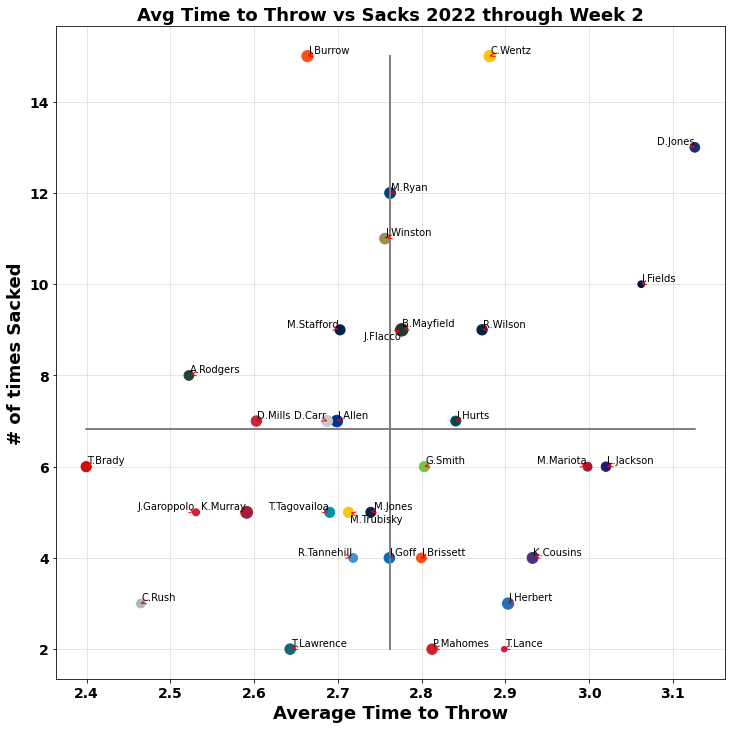

In [9]:
qb_graph = qb_data_full[["player_short_name", "avg_time_to_throw", "Sacked", "team_abbr", "attempts"]]

x = qb_graph["avg_time_to_throw"]
y = qb_graph["Sacked"]
color = []
x_mean = [np.mean(x)]*len(x)
y_mean = [np.mean(y)]*len(y)

for team in qb_graph["team_abbr"]:
    color.append(team_color[team])
    
size = qb_graph["attempts"].to_numpy()
s = [s for s in size]

#Create a figure with size 12x12
fig, ax = plt.subplots(figsize=(12,12))

#Make a scatter plot with success rate data
plt.scatter(x, y, c = color, s = s)

mean_line = ax.plot(x_mean,y, c = 'grey')
mean_line = ax.plot(x,y_mean, c = 'grey')

#Add a grid
ax.grid(zorder=0,alpha=.4)
ax.set_axisbelow(True)

#Adding labels and text
plt.xlabel('Average Time to Throw', fontsize=18, fontweight = "bold")
plt.ylabel('# of times Sacked', fontsize=18, fontweight = "bold")
plt.title('Avg Time to Throw vs Sacks 2022 through Week 2', fontsize=18, fontweight = "bold")
plt.xticks(fontsize=14, fontweight = "bold")
plt.yticks(fontsize=14, fontweight = "bold")

#Add player names to points
texts = [plt.text(x[i], y[i], txt, ha='center', va='center') for i, txt in enumerate(qb_graph["player_short_name"])]    
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='red'))
    
#plt.figtext(.78, .06, 'Data from nflscrapR', fontsize=10)
#plt.xlim(2.45, 3.3)
#plt.ylim(0, 7)

#plt.savefig('Images/AvgTimeThrow_vs_Sacks.png', dpi=400)
plt.show()

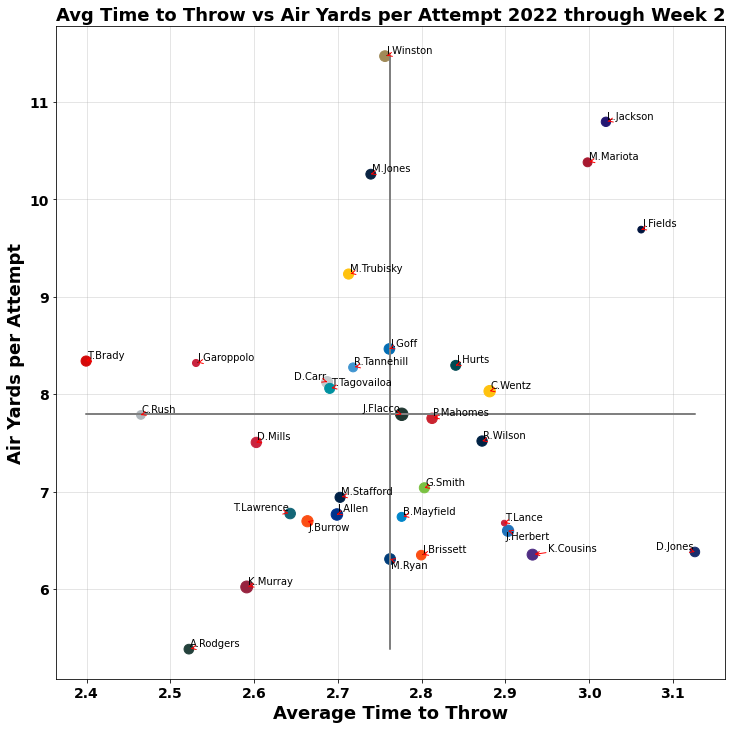

In [10]:
qb_graph = qb_data_full[["player_short_name", "avg_time_to_throw", "Air Yards", "team_abbr", "attempts"]]

x = qb_graph["avg_time_to_throw"]
y = qb_graph["Air Yards"]/qb_graph["attempts"]
color = []
x_mean = [np.mean(x)]*len(x)
y_mean = [np.mean(y)]*len(y)

for team in qb_graph["team_abbr"]:
    color.append(team_color[team])
    
size = qb_graph["attempts"].to_numpy()
s = [s for s in size]

#Create a figure with size 12x12
fig, ax = plt.subplots(figsize=(12,12))

#Make a scatter plot with success rate data
plt.scatter(x, y, c = color, s = s)

mean_line = ax.plot(x_mean,y, c = 'grey')
mean_line = ax.plot(x,y_mean, c = 'grey')

#Add a grid
ax.grid(zorder=0,alpha=.4)
ax.set_axisbelow(True)

#Adding labels and text
plt.xlabel('Average Time to Throw', fontsize=18, fontweight = "bold")
plt.ylabel('Air Yards per Attempt', fontsize=18, fontweight = "bold")
plt.title('Avg Time to Throw vs Air Yards per Attempt 2022 through Week 2', fontsize=18, fontweight = "bold")
plt.xticks(fontsize=14, fontweight = "bold")
plt.yticks(fontsize=14, fontweight = "bold")

#Add player names to points
texts = [plt.text(x[i], y[i], txt, ha='center', va='center') for i, txt in enumerate(qb_graph["player_short_name"])]    
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='red'))
    
#plt.figtext(.78, .06, 'Data from nflscrapR', fontsize=10)
#plt.xlim(2.45, 3.3)
#plt.ylim(0, 7)

#plt.savefig('Images/AvgTimeThrow_vs_AirYardsAttempt.png', dpi=400)
plt.show()

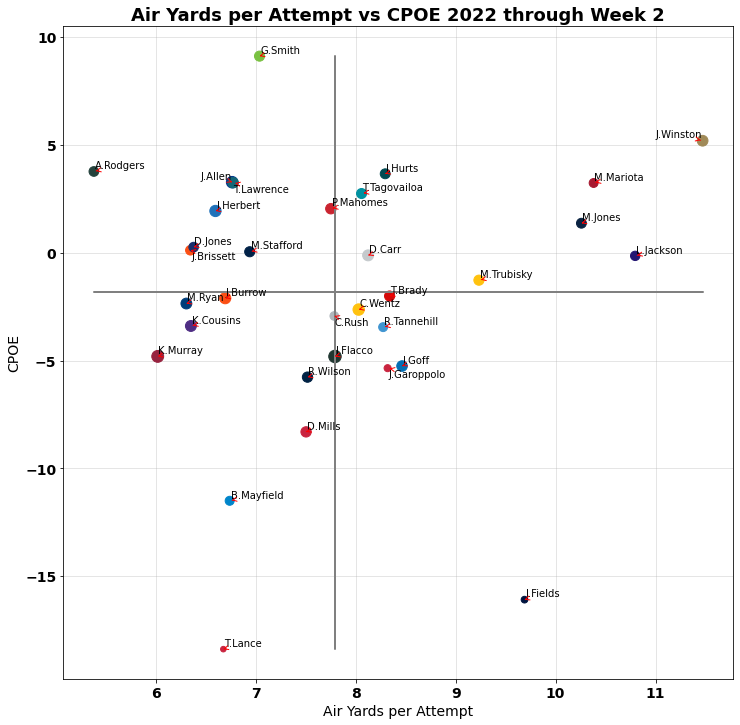

In [11]:
qb_graph = qb_data_full[["player_short_name", "completion_percentage_above_expectation", "Air Yards", "team_abbr", "attempts"]]

y = qb_graph["completion_percentage_above_expectation"]
x = qb_graph["Air Yards"]/qb_graph["attempts"]
color = []
x_mean = [np.mean(x)]*len(x)
y_mean = [np.mean(y)]*len(y)

for team in qb_graph["team_abbr"]:
    color.append(team_color[team])
    
size = qb_graph["attempts"].to_numpy()
s = [s for s in size]

#Create a figure with size 12x12
fig, ax = plt.subplots(figsize=(12,12))

#Make a scatter plot with success rate data
plt.scatter(x, y, c = color, s = s)

mean_line = ax.plot(x_mean,y, c = 'grey')
mean_line = ax.plot(x,y_mean, c = 'grey')

#Add a grid
ax.grid(zorder=0,alpha=.4)
ax.set_axisbelow(True)

#Adding labels and text
plt.ylabel('CPOE', fontsize=14)
plt.xlabel('Air Yards per Attempt', fontsize=14)
plt.title('Air Yards per Attempt vs CPOE 2022 through Week 2', fontsize=18, fontweight = "bold")
plt.xticks(fontsize=14, fontweight = "bold")
plt.yticks(fontsize=14, fontweight = "bold")

#Add player names to points
texts = [plt.text(x[i], y[i], txt, ha='center', va='center') for i, txt in enumerate(qb_graph["player_short_name"])]    
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='red'))
    
#plt.figtext(.78, .06, 'Data from nflscrapR', fontsize=10)
#plt.xlim(2.45, 3.3)
#plt.ylim(0, 7)

#plt.savefig('Images/AirYardsAttempt_vs_CPOE.png', dpi=400)
plt.show()

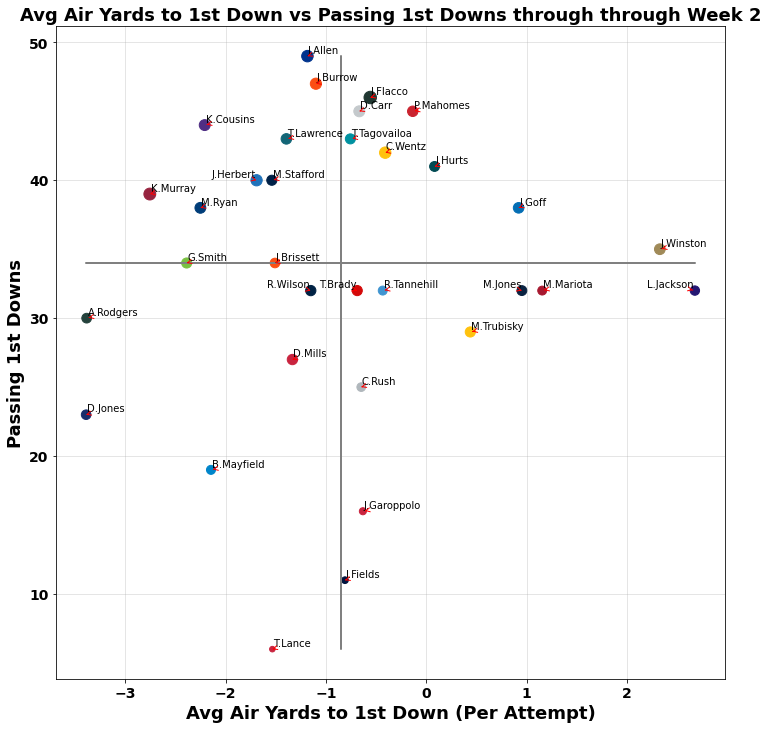

In [12]:
qb_graph = qb_data_full[["player_short_name", "avg_air_yards_to_sticks", "Passing First Downs", "team_abbr", "attempts"]]

x = qb_graph["avg_air_yards_to_sticks"]
y = qb_graph["Passing First Downs"]
color = []
x_mean = [np.mean(x)]*len(x)
y_mean = [np.mean(y)]*len(y)

for team in qb_graph["team_abbr"]:
    color.append(team_color[team])
    
size = qb_graph["attempts"].to_numpy()
s = [s for s in size]

#Create a figure with size 12x12
fig, ax = plt.subplots(figsize=(12,12))

#Make a scatter plot with success rate data
plt.scatter(x, y, c = color, s = s)

mean_line = ax.plot(x_mean,y, c = 'grey')
mean_line = ax.plot(x,y_mean, c = 'grey')

#Add a grid
ax.grid(zorder=0,alpha=.4)
ax.set_axisbelow(True)

#Adding labels and text
plt.xlabel('Avg Air Yards to 1st Down (Per Attempt)', fontsize=18, fontweight = "bold")
plt.ylabel('Passing 1st Downs', fontsize=18, fontweight = "bold")
plt.title('Avg Air Yards to 1st Down vs Passing 1st Downs through through Week 2', fontsize=18, fontweight = "bold")
plt.xticks(fontsize=14, fontweight = "bold")
plt.yticks(fontsize=14, fontweight = "bold")

#Add player names to points
texts = [plt.text(x[i], y[i], txt, ha='center', va='center') for i, txt in enumerate(qb_graph["player_short_name"])]    
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='red'))
    
#plt.figtext(.78, .06, 'Data from nflscrapR', fontsize=10)
#plt.xlim(2.45, 3.3)
#plt.ylim(0, 7)

#plt.savefig('Images/AvgAirYards1stDown_vs_Passing1stDown.png', dpi=400)
plt.show()

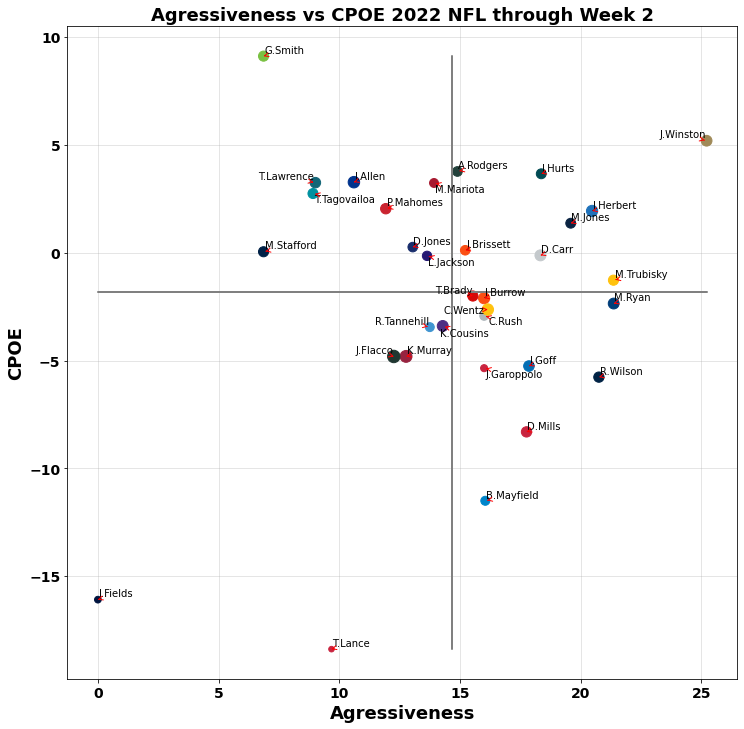

In [13]:
qb_graph = qb_data_full[["player_short_name", "aggressiveness", "completion_percentage_above_expectation", "team_abbr",
                         "attempts"]]

x = qb_graph["aggressiveness"]
y = qb_graph["completion_percentage_above_expectation"]
color = []
x_mean = [np.mean(x)]*len(x)
y_mean = [np.mean(y)]*len(y)

for team in qb_graph["team_abbr"]:
    color.append(team_color[team])
    
size = qb_graph["attempts"].to_numpy()
s = [s for s in size]

#Create a figure with size 12x12
fig, ax = plt.subplots(figsize=(12,12))

#Make a scatter plot with success rate data
plt.scatter(x, y, c = color, s = s)

mean_line = ax.plot(x_mean,y, c = 'grey')
mean_line = ax.plot(x,y_mean, c = 'grey')

#Add a grid
ax.grid(zorder=0,alpha=.4)
ax.set_axisbelow(True)

#Adding labels and text
plt.xlabel('Agressiveness', fontsize=18, fontweight = "bold")
plt.ylabel('CPOE', fontsize=18, fontweight = "bold")
plt.title('Agressiveness vs CPOE 2022 NFL through Week 2', fontsize=18, fontweight = "bold")
plt.xticks(fontsize=14, fontweight = "bold")
plt.yticks(fontsize=14, fontweight = "bold")

#Add player names to points
texts = [plt.text(x[i], y[i], txt, ha='center', va='center') for i, txt in enumerate(qb_graph["player_short_name"])]    
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='red'))
    
#plt.figtext(.78, .06, 'Data from nflscrapR', fontsize=10)
#plt.xlim(2.45, 3.3)
#plt.ylim(0, 7)

#plt.savefig('Images/Agressiveness_vs_CPOE.png', dpi=400)
plt.show()

In [14]:
qb_data_pfr = pd.read_csv("../Resources/advstats_season_pass.csv")
qb_data_pfr = qb_data_pfr.loc[qb_data_pfr["season"] == 2022, :]
qb_data_pfr = qb_data_pfr.drop(columns=["team", "pass_attempts", "season", "pfr_id"])
qb_data_all = qb_data_full.merge(qb_data_pfr, left_on='player_display_name', right_on='player')
qb_data_all.columns

Index(['player_display_name', 'player_position', 'team_abbr',
       'avg_time_to_throw', 'avg_completed_air_yards',
       'avg_intended_air_yards', 'avg_air_yards_differential',
       'aggressiveness', 'max_completed_air_distance',
       'avg_air_yards_to_sticks', 'attempts', 'pass_yards', 'pass_touchdowns',
       'interceptions', 'passer_rating', 'completions',
       'completion_percentage', 'expected_completion_percentage',
       'completion_percentage_above_expectation', 'avg_air_distance',
       'max_air_distance', 'player_gsis_id', 'player_short_name', 'Sacked',
       'Sack Yards', 'Sack Fumbles', 'Sack Fumbles Lost', 'Air Yards',
       'Passing YAC', 'Passing First Downs', 'Passing EPA', '2Pt Conversions',
       'PACR', 'Games Played', 'player', 'throwaways', 'spikes', 'drops',
       'drop_pct', 'bad_throws', 'bad_throw_pct', 'pocket_time',
       'times_blitzed', 'times_hurried', 'times_hit', 'times_pressured',
       'pressure_pct', 'batted_balls', 'on_tgt_throws', 

In [15]:
qb_data_all

,player_display_name,player_position,team_abbr,avg_time_to_throw,avg_completed_air_yards,avg_intended_air_yards,avg_air_yards_differential,aggressiveness,max_completed_air_distance,avg_air_yards_to_sticks,...,on_tgt_throws,on_tgt_pct,rpo_plays,rpo_yards,rpo_pass_att,rpo_pass_yards,rpo_rush_att,rpo_rush_yards,pa_pass_att,pa_pass_yards
0,Kyler Murray,QB,ARI,2.591184,3.729111,6.005373,-2.276262,12.765957,38.988774,-2.755821,...,98.0,73.1,4.0,18.0,3.0,19.0,1.0,-1.0,5.0,43.0
1,Marcus Mariota,QB,ATL,2.998359,7.503200,10.101316,-2.598116,13.924051,38.677138,1.153947,...,57.0,75.0,40.0,324.0,25.0,283.0,13.0,41.0,10.0,78.0
2,Lamar Jackson,QB,BAL,3.020307,7.680357,11.192941,-3.512584,13.636364,58.484966,2.675294,...,58.0,68.2,20.0,294.0,13.0,174.0,7.0,120.0,16.0,189.0
3,Josh Allen,QB,BUF,2.698924,6.036277,6.838560,-0.802283,10.606061,55.192900,-1.185440,...,94.0,74.6,10.0,70.0,10.0,70.0,0.0,0.0,30.0,285.0
4,Baker Mayfield,QB,CAR,2.776247,4.771429,6.905455,-2.134026,16.049383,54.658197,-2.146494,...,47.0,63.5,2.0,6.0,1.0,0.0,1.0,6.0,22.0,158.0
5,Justin Fields,QB,CHI,3.062422,6.008261,9.188636,-3.180375,0.000000,40.817379,-0.811364,...,29.0,65.9,5.0,10.0,1.0,8.0,4.0,2.0,8.0,104.0
6,Joe Burrow,QB,CIN,2.663760,5.015750,7.305772,-2.290022,16.000000,50.203717,-1.100732,...,90.0,74.4,4.0,15.0,4.0,15.0,0.0,0.0,12.0,124.0
7,Jacoby Brissett,QB,CLE,2.799689,5.031803,6.945682,-1.913879,15.217391,37.838076,-1.508864,...,67.0,76.1,4.0,12.0,4.0,12.0,0.0,0.0,15.0,148.0
8,Cooper Rush,QB,DAL,2.464797,6.116809,8.170139,-2.053330,16.000000,35.920001,-0.649306,...,29.0,39.2,0.0,0.0,0.0,0.0,0.0,0.0,6.0,55.0
9,Russell Wilson,QB,DEN,2.872330,5.403016,7.580495,-2.177479,20.754717,42.867639,-1.152178,...,78.0,77.2,5.0,31.0,5.0,31.0,0.0,0.0,20.0,201.0


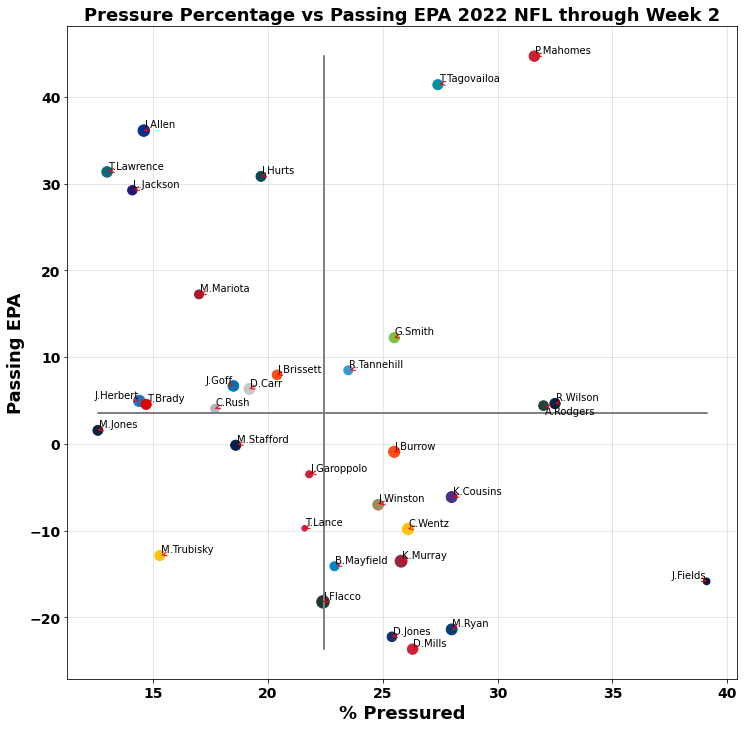

In [16]:
qb_graph = qb_data_all[["player_short_name", "pressure_pct", "Passing EPA", "team_abbr",
                         "attempts"]]

x = qb_graph["pressure_pct"]
y = qb_graph["Passing EPA"]
color = []
x_mean = [np.mean(x)]*len(x)
y_mean = [np.mean(y)]*len(y)

for team in qb_graph["team_abbr"]:
    color.append(team_color[team])
    
size = qb_graph["attempts"].to_numpy()
s = [s for s in size]

#Create a figure with size 12x12
fig, ax = plt.subplots(figsize=(12,12))

#Make a scatter plot with success rate data
plt.scatter(x, y, c = color, s = s)

mean_line = ax.plot(x_mean,y, c = 'grey')
mean_line = ax.plot(x,y_mean, c = 'grey')

#Add a grid
ax.grid(zorder=0,alpha=.4)
ax.set_axisbelow(True)

#Adding labels and text
plt.xlabel('% Pressured', fontsize=18, fontweight = "bold")
plt.ylabel('Passing EPA', fontsize=18, fontweight = "bold")
plt.title('Pressure Percentage vs Passing EPA 2022 NFL through Week 2', fontsize=18, fontweight = "bold")
plt.xticks(fontsize=14, fontweight = "bold")
plt.yticks(fontsize=14, fontweight = "bold")

#Add player names to points
texts = [plt.text(x[i], y[i], txt, ha='center', va='center') for i, txt in enumerate(qb_graph["player_short_name"])]    
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='red'))
    
#plt.figtext(.78, .06, 'Data from nflscrapR', fontsize=10)
#plt.xlim(2.45, 3.3)
#plt.ylim(0, 7)

#plt.savefig('Images/AvgAirYards1stDown_vs_Passing1stDown.png', dpi=400)
plt.show()

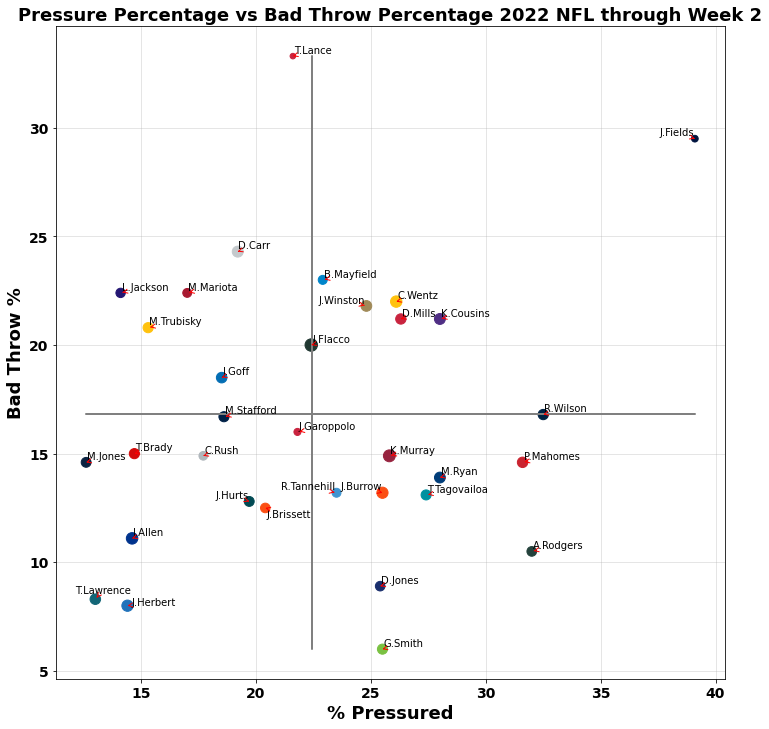

In [17]:
qb_graph = qb_data_all[["player_short_name", "pressure_pct", "bad_throw_pct", "team_abbr",
                         "attempts"]]

x = qb_graph["pressure_pct"]
y = qb_graph["bad_throw_pct"]
color = []
x_mean = [np.mean(x)]*len(x)
y_mean = [np.mean(y)]*len(y)

for team in qb_graph["team_abbr"]:
    color.append(team_color[team])
    
size = qb_graph["attempts"].to_numpy()
s = [s for s in size]

#Create a figure with size 12x12
fig, ax = plt.subplots(figsize=(12,12))

#Make a scatter plot with success rate data
plt.scatter(x, y, c = color, s = s)

mean_line = ax.plot(x_mean,y, c = 'grey')
mean_line = ax.plot(x,y_mean, c = 'grey')

#Add a grid
ax.grid(zorder=0,alpha=.4)
ax.set_axisbelow(True)

#Adding labels and text
plt.xlabel('% Pressured', fontsize=18, fontweight = "bold")
plt.ylabel('Bad Throw %', fontsize=18, fontweight = "bold")
plt.title('Pressure Percentage vs Bad Throw Percentage 2022 NFL through Week 2', fontsize=18, fontweight = "bold")
plt.xticks(fontsize=14, fontweight = "bold")
plt.yticks(fontsize=14, fontweight = "bold")

#Add player names to points
texts = [plt.text(x[i], y[i], txt, ha='center', va='center') for i, txt in enumerate(qb_graph["player_short_name"])]    
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='red'))
    
#plt.figtext(.78, .06, 'Data from nflscrapR', fontsize=10)
#plt.xlim(2.45, 3.3)
#plt.ylim(0, 7)

#plt.savefig('Images/AvgAirYards1stDown_vs_Passing1stDown.png', dpi=400)
plt.show()

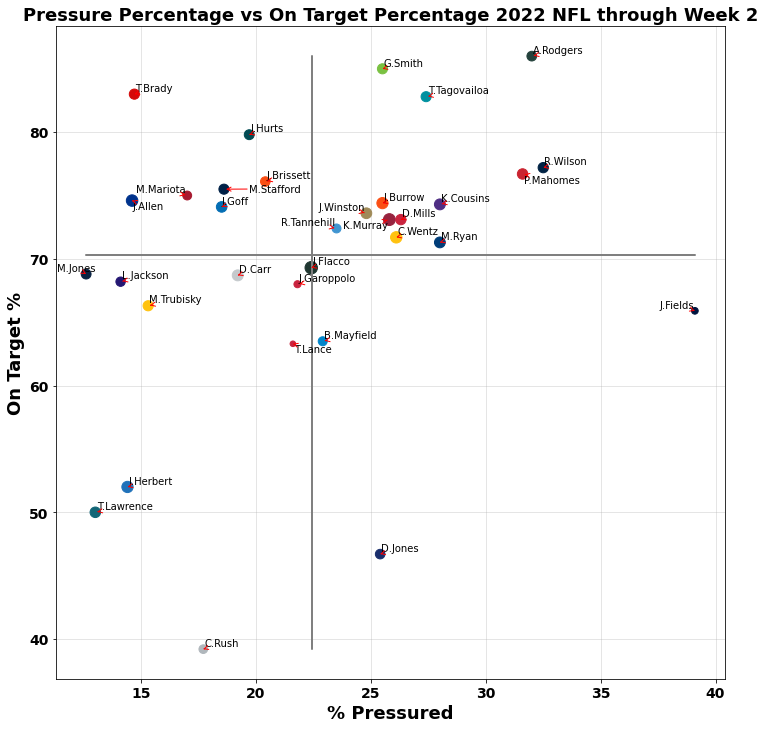

In [18]:
qb_graph = qb_data_all[["player_short_name", "pressure_pct", "on_tgt_pct", "team_abbr",
                         "attempts"]]

x = qb_graph["pressure_pct"]
y = qb_graph["on_tgt_pct"]
color = []
x_mean = [np.mean(x)]*len(x)
y_mean = [np.mean(y)]*len(y)

for team in qb_graph["team_abbr"]:
    color.append(team_color[team])
    
size = qb_graph["attempts"].to_numpy()
s = [s for s in size]

#Create a figure with size 12x12
fig, ax = plt.subplots(figsize=(12,12))

#Make a scatter plot with success rate data
plt.scatter(x, y, c = color, s = s)

mean_line = ax.plot(x_mean,y, c = 'grey')
mean_line = ax.plot(x,y_mean, c = 'grey')

#Add a grid
ax.grid(zorder=0,alpha=.4)
ax.set_axisbelow(True)

#Adding labels and text
plt.xlabel('% Pressured', fontsize=18, fontweight = "bold")
plt.ylabel('On Target %', fontsize=18, fontweight = "bold")
plt.title('Pressure Percentage vs On Target Percentage 2022 NFL through Week 2', fontsize=18, fontweight = "bold")
plt.xticks(fontsize=14, fontweight = "bold")
plt.yticks(fontsize=14, fontweight = "bold")

#Add player names to points
texts = [plt.text(x[i], y[i], txt, ha='center', va='center') for i, txt in enumerate(qb_graph["player_short_name"])]    
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='red'))
    
#plt.figtext(.78, .06, 'Data from nflscrapR', fontsize=10)
#plt.xlim(2.45, 3.3)
#plt.ylim(0, 7)

#plt.savefig('Images/AvgAirYards1stDown_vs_Passing1stDown.png', dpi=400)
plt.show()

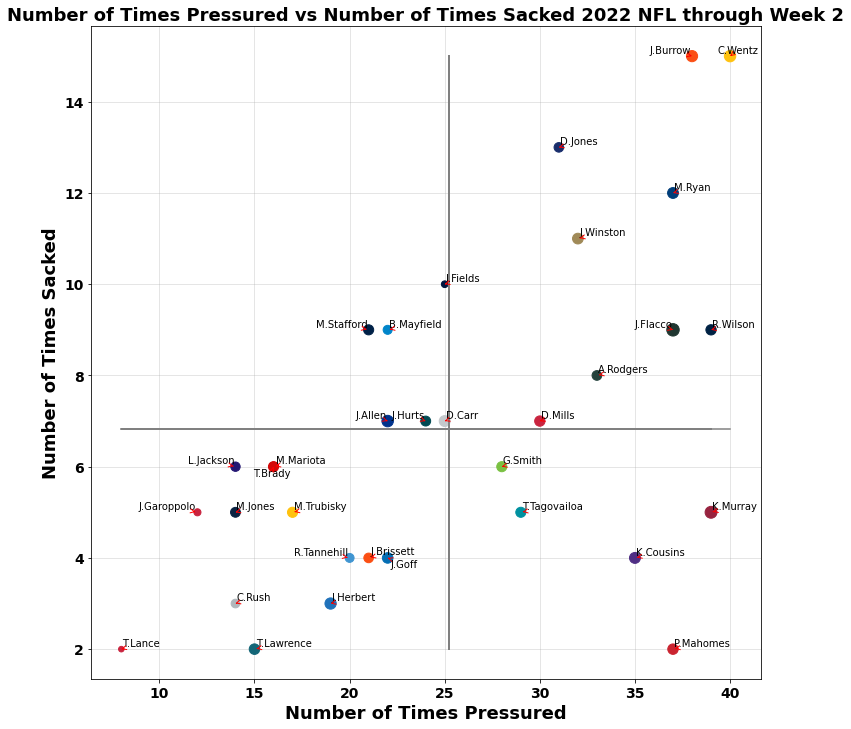

In [19]:
qb_graph = qb_data_all[["player_short_name", "times_pressured", "Sacked", "team_abbr",
                         "attempts"]]

x = qb_graph["times_pressured"]
y = qb_graph["Sacked"]
color = []
x_mean = [np.mean(x)]*len(x)
y_mean = [np.mean(y)]*len(y)

for team in qb_graph["team_abbr"]:
    color.append(team_color[team])
    
size = qb_graph["attempts"].to_numpy()
s = [s for s in size]

#Create a figure with size 12x12
fig, ax = plt.subplots(figsize=(12,12))

#Make a scatter plot with success rate data
plt.scatter(x, y, c = color, s = s)

mean_line = ax.plot(x_mean,y, c = 'grey')
mean_line = ax.plot(x,y_mean, c = 'grey')

#Add a grid
ax.grid(zorder=0,alpha=.4)
ax.set_axisbelow(True)

#Adding labels and text
plt.xlabel('Number of Times Pressured', fontsize=18, fontweight = "bold")
plt.ylabel('Number of Times Sacked', fontsize=18, fontweight = "bold")
plt.title('Number of Times Pressured vs Number of Times Sacked 2022 NFL through Week 2', fontsize=18, fontweight = "bold")
plt.xticks(fontsize=14, fontweight = "bold")
plt.yticks(fontsize=14, fontweight = "bold")

#Add player names to points
texts = [plt.text(x[i], y[i], txt, ha='center', va='center') for i, txt in enumerate(qb_graph["player_short_name"])]    
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='red'))
    
#plt.figtext(.78, .06, 'Data from nflscrapR', fontsize=10)
#plt.xlim(2.45, 3.3)
#plt.ylim(0, 7)

#plt.savefig('Images/AvgAirYards1stDown_vs_Passing1stDown.png', dpi=400)
plt.show()

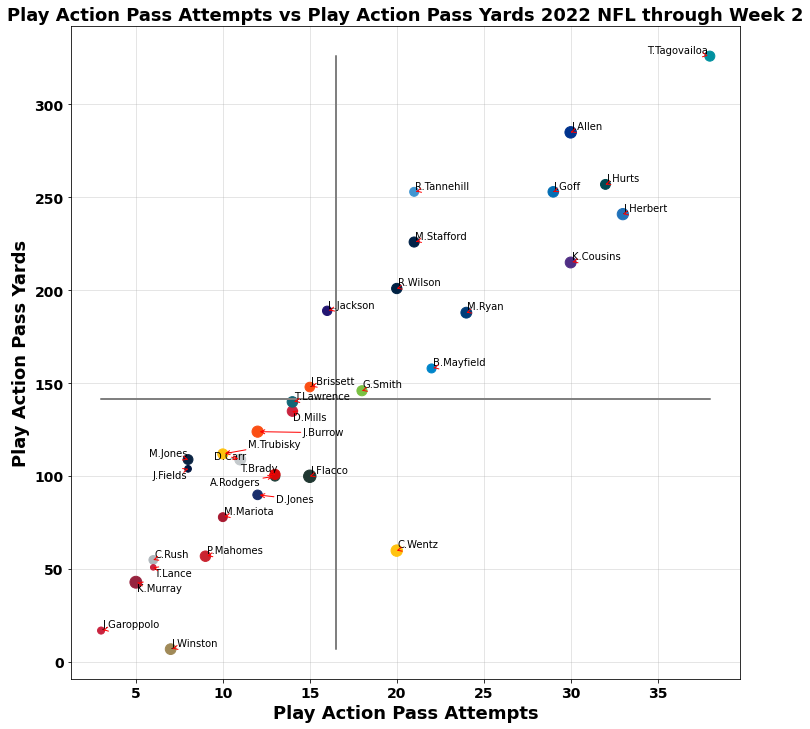

In [20]:
qb_graph = qb_data_all[["player_short_name", "pa_pass_att", "pa_pass_yards", "team_abbr",
                         "attempts"]]

x = qb_graph["pa_pass_att"]
y = qb_graph["pa_pass_yards"]
color = []
x_mean = [np.mean(x)]*len(x)
y_mean = [np.mean(y)]*len(y)

for team in qb_graph["team_abbr"]:
    color.append(team_color[team])
    
size = qb_graph["attempts"].to_numpy()
s = [s for s in size]

#Create a figure with size 12x12
fig, ax = plt.subplots(figsize=(12,12))

#Make a scatter plot with success rate data
plt.scatter(x, y, c = color, s = s)

mean_line = ax.plot(x_mean,y, c = 'grey')
mean_line = ax.plot(x,y_mean, c = 'grey')

#Add a grid
ax.grid(zorder=0,alpha=.4)
ax.set_axisbelow(True)

#Adding labels and text
plt.xlabel('Play Action Pass Attempts', fontsize=18, fontweight = "bold")
plt.ylabel('Play Action Pass Yards', fontsize=18, fontweight = "bold")
plt.title('Play Action Pass Attempts vs Play Action Pass Yards 2022 NFL through Week 2', fontsize=18, fontweight = "bold")
plt.xticks(fontsize=14, fontweight = "bold")
plt.yticks(fontsize=14, fontweight = "bold")

#Add player names to points
texts = [plt.text(x[i], y[i], txt, ha='center', va='center') for i, txt in enumerate(qb_graph["player_short_name"])]    
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='red'))
    
#plt.figtext(.78, .06, 'Data from nflscrapR', fontsize=10)
#plt.xlim(2.45, 3.3)
#plt.ylim(0, 7)

#plt.savefig('Images/AvgAirYards1stDown_vs_Passing1stDown.png', dpi=400)
plt.show()